The Jacobian is:  

⎡-115.7⋅sin(θ₁)⋅sin(θ₂)⋅sin(θ₃)⋅sin(θ₄) + 192.2⋅sin(θ₁)⋅sin(θ₂)⋅sin(θ₃)⋅sin(θ₅
⎢                                                                             
⎢-192.2⋅sin(θ₁)⋅cos(θ₅) - 163.9⋅sin(θ₁) + 115.7⋅sin(θ₂)⋅sin(θ₃)⋅sin(θ₄)⋅cos(θ₁
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

)⋅cos(θ₄) - 192.2⋅sin(θ₁)⋅sin(θ₂)⋅sin(θ₄)⋅sin(θ₅)⋅cos(θ₃) - 115.7⋅sin(θ₁)⋅sin(
                               

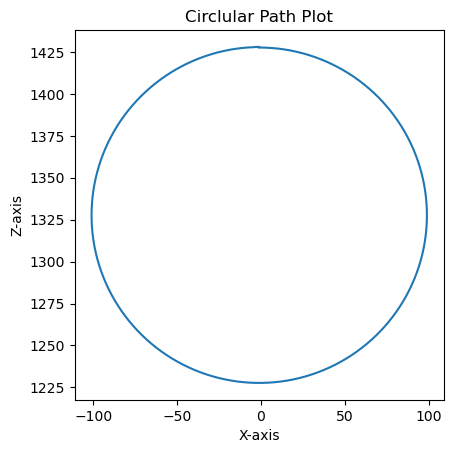

(0.0, 1000.0)

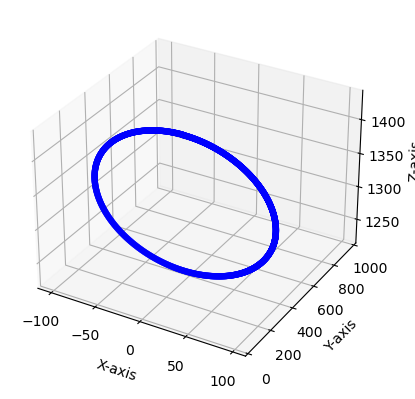

In [1]:
from sympy import *
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d,Axes3D

## Code to get the symbolic final transformation matrix 

theta_1 = symbols("theta_1")   
theta_2 = symbols("theta_2")   
theta_3 = symbols("theta_3")   
theta_4 = symbols("theta_4")
theta_5 = symbols("theta_5")   
theta_6 = symbols("theta_6")
t=symbols("t")

## Defining transformation matrices

t1 = Matrix([[cos(theta_1),0,-sin(theta_1),0],[sin(theta_1),0,cos(theta_1),0],[0,-1,0,128],[0,0,0,1]])
t2 = Matrix([[cos(theta_2),0,sin(theta_2),0],[sin(theta_2),0,-cos(theta_2),0],[0,1,0,176],[0,0,0,1]])
t3 = Matrix([[1,0,0,0],[0,0,-1,0],[0,1,0,612.7],[0,0,0,1]])
t4 = Matrix([[cos(theta_3),0,-sin(theta_3),0],[sin(theta_3),0,cos(theta_3),0],[0,-1,0,176],[0,0,0,1]])
t5 = Matrix([[1,0,0,0],[0,0,1,0],[0,-1,0,571.6],[0,0,0,1]])
t6 = Matrix([[cos(theta_4),0,sin(theta_4),0],[sin(theta_4),0,-cos(theta_4),0],[0,1,0,163.9],[0,0,0,1]])
t7 = Matrix([[cos(theta_5),0,-sin(theta_5),0],[sin(theta_5),0,cos(theta_5),0],[0,-1,0,115.7],[0,0,0,1]])
t8 = Matrix([[cos(theta_6),-sin(theta_6),0,0],[sin(theta_6),cos(theta_6),0,0],[0,0,1,192.2],[0,0,0,1]])

## Obtaining Matrix T

T1=t1
T2=t1*t2
T3=t1*t2*t3*t4
T4=t1*t2*t3*t4*t5*t6
T5=t1*t2*t3*t4*t5*t6*t7
T6=t1*t2*t3*t4*t5*t6*t7*t8

## Obtaining Column Matrices Z

Z1=T1[0:3,2]
Z2=T2[0:3,2]
Z3=T3[0:3,2]
Z4=T4[0:3,2]
Z5=T5[0:3,2]
Z6=T6[0:3,2]

## Obtaining Row Matrix P

P=expand(T6[0:3,3])

## Obtaining partial derivate of P wrt different joint angles 

p1=diff(P,theta_1)
p2=diff(P,theta_2)
p3=diff(P,theta_3)
p4=diff(P,theta_4)
p5=diff(P,theta_5)
p6=diff(P,theta_6)

## Obtaining Jacobian Matrix J

J1=Matrix.hstack(p1,p2,p3,p4,p5,p6)
J2=Matrix.hstack(Z1,Z2,Z3,Z4,Z5,Z6)
J=Matrix.vstack(J1,J2)

print("The Jacobian is: ",'\n')
pprint(J)

t1=0.0000001
t2=0.0000001
t3=0.0000001
t4=0.0000001
t5=0.0000001
t6=0.0000001
t=0
xxx=[]
yyy=[]
zzz=[]

# Loop to get trajectory values

while t<=15:
    
    #Substituting the angle values into the Jacobian
    
    JS=J.subs([(theta_1,t1),(theta_2,t2),(theta_3,t3),(theta_4,t4),(theta_5,t5),(theta_6,t6)])
    
    # Computing velocity trajectory
    
    X_dot = Matrix([[-(40/3)*math.pi*sin((math.pi/2)+(((2*math.pi)/15)*t))],[0],[(40/3)*math.pi*cos((math.pi/2)+(((2*math.pi)/15)*t))],[0],[0],[0]])
    
    #Computing Joint Velocities
    
    Q_dot = JS.pinv() * X_dot
    q1_dot=Q_dot[0,0]
    q2_dot=Q_dot[1,0]
    q3_dot=Q_dot[2,0]
    q4_dot=Q_dot[3,0]
    q5_dot=Q_dot[4,0]
    q6_dot=Q_dot[5,0]
    
    #Computing Joint Angle 
    
    q1=t1+(q1_dot*0.01)
    q2=t2+(q2_dot*0.01)
    q3=t3+(q3_dot*0.01)
    q4=t4+(q4_dot*0.01)
    q5=t5+(q5_dot*0.01)
    q6=t6+(q6_dot*0.01)

    ## Substituting the new joint angle values to Final transformation matrix
    
    TU=T6.subs([(theta_1,q1),(theta_2,q2),(theta_3,q3),(theta_4,q4),(theta_5,q5),(theta_6,q6)])

    ## Extracting Position values of the end effector wrt base
    
    xx=TU[0,3]
    yy=TU[1,3]
    zz=TU[2,3]
    xxx.append(xx)
    yyy.append(yy)
    zzz.append(zz)
    t1=q1
    t2=q2
    t3=q3
    t4=q4
    t5=q5
    t6=q6
    t=t+0.01


## 2D plot of the circle
    
fig, ax = plt.subplots()
plt.plot(xxx,zzz)
ax.set_aspect('equal')
plt.title('Circlular Path Plot')
plt.xlabel('X-axis')
plt.ylabel('Z-axis')
plt.show()

## 3D plot of the circle

fig = plt.figure()

ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(xxx, yyy, zzz,color='b',linewidths=0.1)
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')
ax1.set_ylim3d(0, 1000)